In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# A1qFor example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv
/kaggle/input/marketingstrategypersonalisedoffertrain/train_data.csv


# Loading Dataset

In [3]:
train_data=pd.read_csv('../input/marketing-strategy-personalised-offer/train_data.csv')
test_data=pd.read_csv('../input/marketing-strategy-personalised-offer/test_data.csv')

In [4]:
train_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


# Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

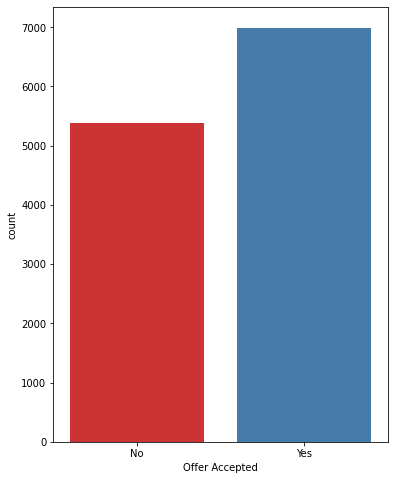

In [6]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Offer Accepted", data= train_data, palette="Set1")
plt.show()

In [7]:
offeracceptedperc = (train_data['Offer Accepted'].value_counts('Yes'))/12379
train_data['Offer Accepted'].value_counts(1)*100

Yes    56.498909
No     43.501091
Name: Offer Accepted, dtype: float64

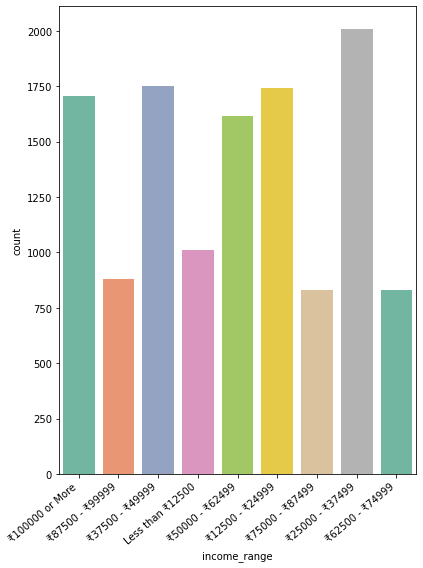

In [8]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="income_range", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

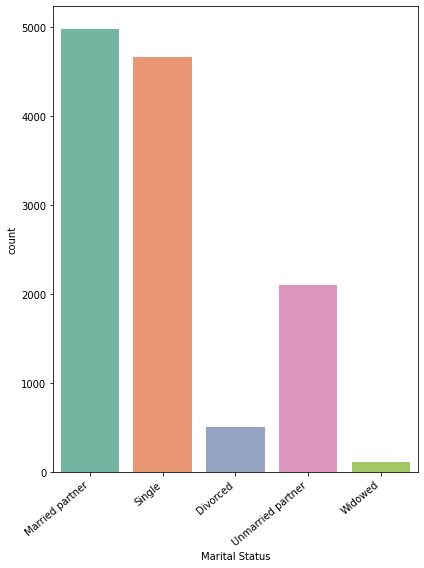

In [9]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="Marital Status", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

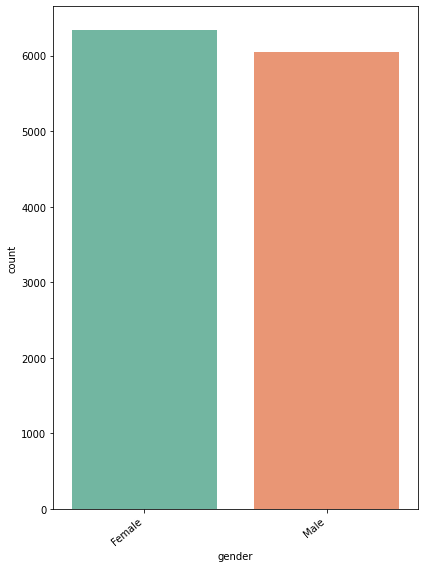

In [10]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="gender", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

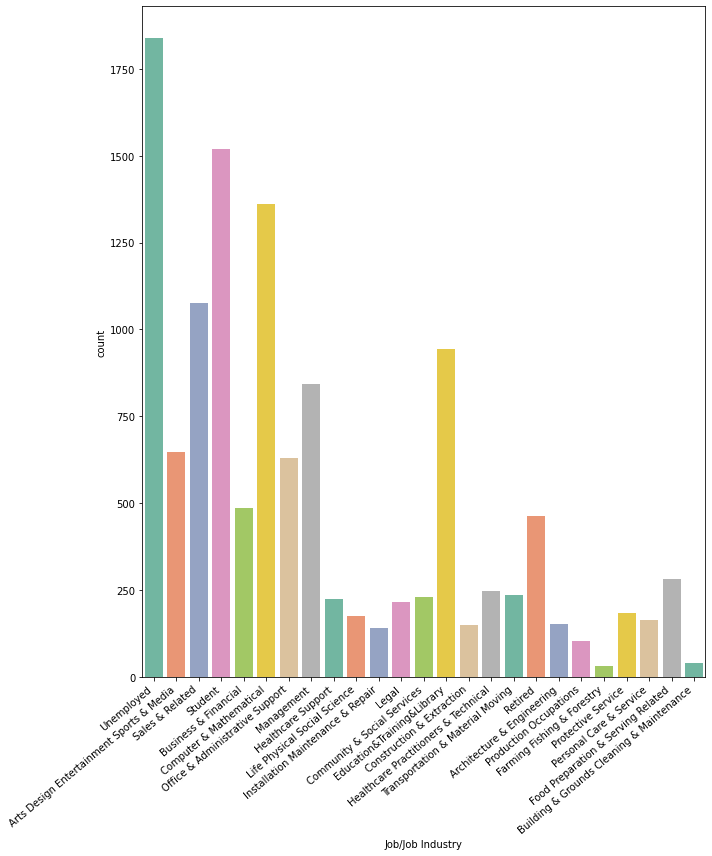

In [11]:
f, ax = plt.subplots(figsize=(10, 12))
ax = sns.countplot(x="Job/Job Industry", data= train_data, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [12]:
train_data.isnull().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [13]:
#removing column car as it contains null values
train_data=train_data.drop(columns=['car'])  
test_data=test_data.drop(columns=['car'])

In [14]:
#replacing null values with most frequent values
train_data=train_data.fillna(train_data.mode().iloc[0]) 
test_data=test_data.fillna(test_data.mode().iloc[0]) 

In [15]:
#checking if target column contains null values 
train_data['Offer Accepted'].isnull().sum()

0

In [16]:
#binary encoding
y_train=[]      #creating new array for target variable
for i in range(len(train_data["Offer Accepted"])):
    if train_data["Offer Accepted"][i]=="Yes":
        y_train += [1]
    else:
        y_train += [0]
    
train_data=train_data.drop(columns=['Offer Accepted'])

In [17]:
# As we can work only on categorical and numerical values, we need to convert all the values in preprocssing of the data

train_data['income_range']=train_data['income_range'].replace(['₹100000 or More','₹87500 - ₹99999','₹37500 - ₹49999','Less than ₹12500',
 '₹50000 - ₹62499','₹12500 - ₹24999','₹75000 - ₹87499','₹25000 - ₹37499','₹62500 - ₹74999'],[100000,99999,87499,74999,62499,49999,37499,24999,12499])

test_data['income_range']=test_data['income_range'].replace(['₹100000 or More','₹87500 - ₹99999','₹37500 - ₹49999','Less than ₹12500',
 '₹50000 - ₹62499','₹12500 - ₹24999','₹75000 - ₹87499','₹25000 - ₹37499','₹62500 - ₹74999'],[100000,99999,87499,74999,62499,49999,37499,24999,12499])

train_data['age']=train_data['age'].replace(['36','50plus','26','46','21','below21','41','31'],[36,51,26,46,21,20,41,31])
test_data['age']=test_data['age'].replace(['36','50plus','26','46','21','below21','41','31'],[36,51,26,46,21,20,41,31])

In [18]:
# categorical variables
categ_train=train_data.select_dtypes(include='O').keys()
categ_test=test_data.select_dtypes(include='O').keys()

In [19]:
#converting categorical variables into dummy variables 
train_cat=pd.get_dummies(train_data[categ_train])
test_cat=pd.get_dummies(test_data[categ_test])

In [20]:
#merging previous data into their respective training and test sets
train_data=pd.concat([train_data,train_cat],axis=1)
test_data=pd.concat([test_data,test_cat],axis=1)

#droping unchanged variable from the dataset
train_data.drop(categ_train,axis=1,inplace=True)
test_data.drop(categ_test,axis=1,inplace=True)

In [21]:
X_train=train_data
X_test=test_data

In [22]:
#preprocessing complete

# Models Implementation

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression(random_state=21)
lr.fit(X_train,y_train)

LogisticRegression(random_state=21)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
grid={"C":[0.001,0.01,0.1,1,10,100],
      'solver':['liblinear'] ,
      "penalty":["l1","l2"]}

# l1 lasso l2 ridge

log_reg=LogisticRegression()
lr_cv=GridSearchCV(log_reg,grid,cv=10)
lr_cv.fit(X_train,y_train)

print(lr_cv.best_score_)
print(lr_cv.best_params_) 

0.6115184346933471
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [27]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [28]:
nn = KNeighborsClassifier(n_neighbors=3)
nn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
from sklearn.model_selection import GridSearchCV
grid_knn={'n_neighbors':[2,3,5,7],'p':[1,2]}
knn_cv=GridSearchCV(KNeighborsClassifier(),grid_knn,cv=10)
knn_cv.fit(X_train,y_train)

print(knn_cv.best_params_)

{'n_neighbors': 5, 'p': 1}


In [41]:
knn2=KNeighborsClassifier(n_neighbors=5,p=1)
knn2.fit(X_train,y_train)
print(knn_cv.best_score_)

0.569675775072058


In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [34]:
clf = DecisionTreeClassifier(random_state=1234)

In [36]:
np.random.seed(42)
dstclf = DecisionTreeClassifier()
dstclf.fit(X_train,y_train)
dstclf.score(X_train,y_train)

1.0

[Text(0.759379764915049, 0.9814814814814815, 'X[21] <= 0.5\ngini = 0.492\nsamples = 12379\nvalue = [5385, 6994]'),
 Text(0.581004292370568, 0.9444444444444444, 'X[4] <= 0.5\ngini = 0.484\nsamples = 9476\nvalue = [3880, 5596]'),
 Text(0.4365163082200916, 0.9074074074074074, 'X[45] <= 0.5\ngini = 0.477\nsamples = 8341\nvalue = [3275, 5066]'),
 Text(0.2781990069554671, 0.8703703703703703, 'X[1] <= 0.5\ngini = 0.486\nsamples = 6040\nvalue = [2507, 3533]'),
 Text(0.14884368931129904, 0.8333333333333334, 'X[20] <= 0.5\ngini = 0.471\nsamples = 3146\nvalue = [1193, 1953]'),
 Text(0.06881016722159736, 0.7962962962962963, 'X[12] <= 53.5\ngini = 0.453\nsamples = 1962\nvalue = [680, 1282]'),
 Text(0.024504931305974857, 0.7592592592592593, 'X[41] <= 0.5\ngini = 0.488\nsamples = 392\nvalue = [166, 226]'),
 Text(0.01877818452255813, 0.7222222222222222, 'X[57] <= 0.5\ngini = 0.467\nsamples = 247\nvalue = [92, 155]'),
 Text(0.01653294895513602, 0.6851851851851852, 'X[64] <= 0.5\ngini = 0.456\nsamples =

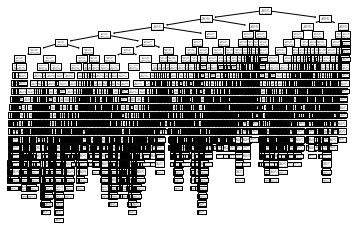

In [43]:
tree.plot_tree(dstclf)

In [44]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [45]:
clf = RandomForestClassifier()

grid_rfc= { 
    'max_features': [None,'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [51]:
rfc_par=RandomForestClassifier()
# rfc_par = KNeighborsClassifier()
rfc_par.fit(X_train,y_train)

RandomForestClassifier()

# Creating Submission

In [47]:
ids=[i for i in range(len(X_test))]
y_pred=rfc_par.predict(X_test)
sub=[]
for i in range(len(y_pred)):
    if y_pred[i]==1:
        sub+=["Yes"]
    else:
        sub+=['No']


final_prediction=pd.DataFrame({'id':ids, 'Offer Accepted':sub})
final_prediction.to_csv('submission.csv',index=False)